In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load data
path = "/kaggle/input/us-accidents/US_Accidents_March23.csv"
df = pd.read_csv(path, low_memory=False)

# 2) Parse datetime with format='mixed' to handle inconsistent time formats
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time']   = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')

# 3) Select columns
cols = [
    "ID", "Severity", "Start_Time", "End_Time", "Start_Lat", "Start_Lng",
    "City", "State", "Weather_Condition", "Visibility(mi)", "Precipitation(in)",
    "Temperature(F)", "Sunrise_Sunset", "Amenity", "Bump", "Crossing",
    "Junction", "Traffic_Signal"
]
df = df[cols]

print("Data loaded successfully!")
print(df.info())


Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   City               object        
 7   State              object        
 8   Weather_Condition  object        
 9   Visibility(mi)     float64       
 10  Precipitation(in)  float64       
 11  Temperature(F)     float64       
 12  Sunrise_Sunset     object        
 13  Amenity            bool          
 14  Bump               bool          
 15  Crossing           bool          
 16  Junction           bool          
 17  Traffic_Signal     bool          
dtypes: bool(5), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage:

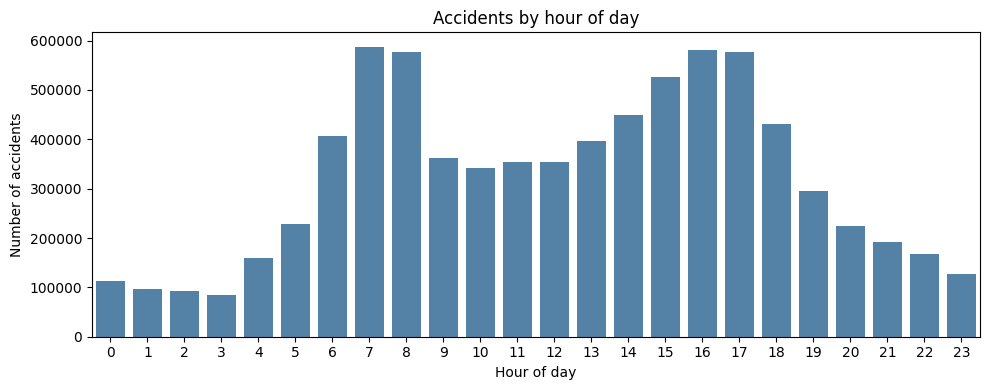

In [5]:
# Time features
df['hour'] = df['Start_Time'].dt.hour
df['weekday'] = df['Start_Time'].dt.day_name()
df['month'] = df['Start_Time'].dt.month

# Accidents by hour
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color="steelblue")
plt.xlabel("Hour of day")
plt.ylabel("Number of accidents")
plt.title("Accidents by hour of day")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


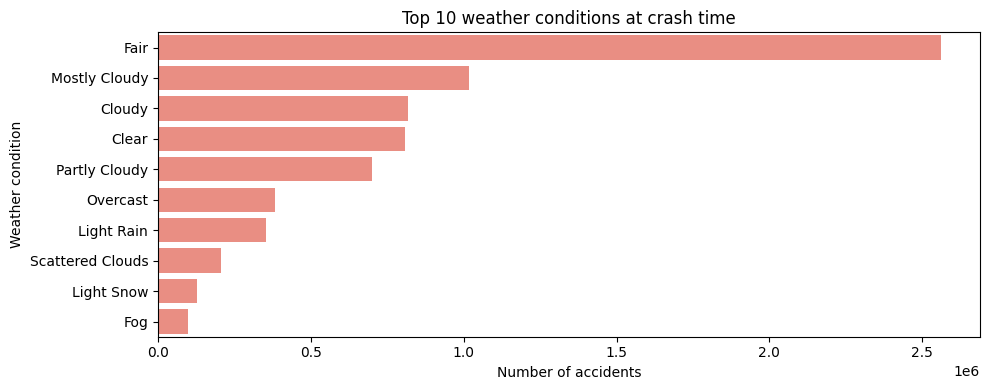

/tmp/ipykernel_47/3855989786.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['visibility_band'])['Severity']
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


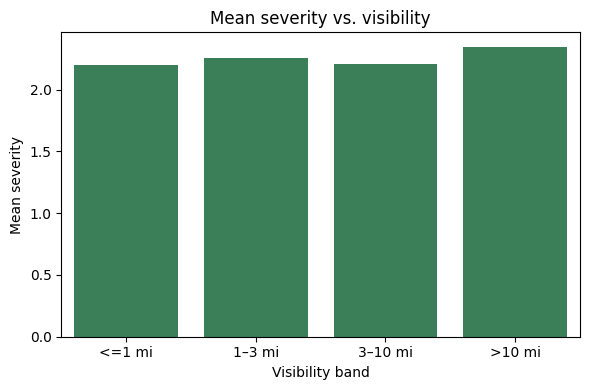

In [6]:
# Top weather conditions by frequency
top_weather = (
    df['Weather_Condition']
      .value_counts()
      .head(10)
)

plt.figure(figsize=(10,4))
sns.barplot(y=top_weather.index, x=top_weather.values, color="salmon")
plt.xlabel("Number of accidents")
plt.ylabel("Weather condition")
plt.title("Top 10 weather conditions at crash time")
plt.tight_layout()
plt.show()

# Severity distribution under different visibility bands
df['visibility_band'] = pd.cut(
    df['Visibility(mi)'],
    bins=[-0.1, 1, 3, 10, 50],
    labels=["<=1 mi", "1–3 mi", "3–10 mi", ">10 mi"]
)

severity_by_vis = (
    df.groupby(['visibility_band'])['Severity']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=severity_by_vis, x='visibility_band', y='Severity', color='seagreen')
plt.xlabel("Visibility band")
plt.ylabel("Mean severity")
plt.title("Mean severity vs. visibility")
plt.tight_layout()
plt.show()


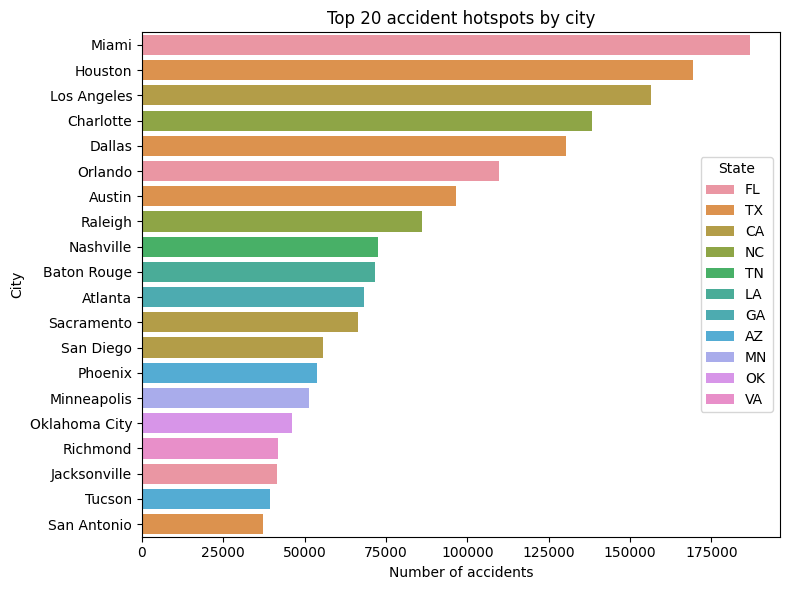

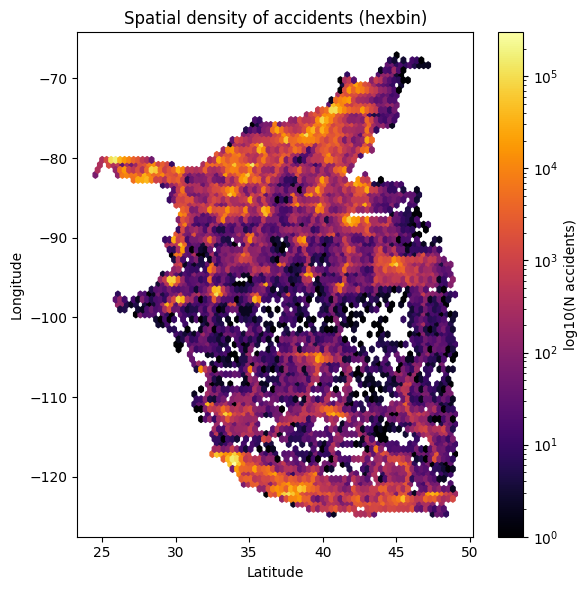

In [7]:
# 1) City-level hotspot table
city_counts = (
    df.groupby(['State', 'City'])['ID']
      .count()
      .reset_index(name='n_accidents')
      .sort_values('n_accidents', ascending=False)
)

# Top 20 cities by accident count
top_cities = city_counts.head(20)

plt.figure(figsize=(8,6))
sns.barplot(data=top_cities, y='City', x='n_accidents', hue='State', dodge=False)
plt.xlabel("Number of accidents")
plt.ylabel("City")
plt.title("Top 20 accident hotspots by city")
plt.tight_layout()
plt.show()

# 2) Lat/Lng heatmap-style plot (quick view)
plt.figure(figsize=(6,6))
plt.hexbin(df['Start_Lat'], df['Start_Lng'], gridsize=80, cmap='inferno', bins='log')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Spatial density of accidents (hexbin)")
plt.colorbar(label="log10(N accidents)")
plt.tight_layout()
plt.show()
